1.Set font

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

2.Transformer without Data Augmentation

    Experimental Value  Predicted Value        MAE
0            61.700005        42.879470  18.820535
26           49.400010        30.639640  18.760370
10           32.400000        15.648877  16.751123
24           53.360010        37.420730  15.939280
19            9.219999        25.039455  15.819456
35            4.799999        19.759790  14.959791
1            43.000000        28.357044  14.642956
0            38.900000        25.169956  13.730044
5            16.440000         4.303693  12.136307
39           31.000000        19.275578  11.724422


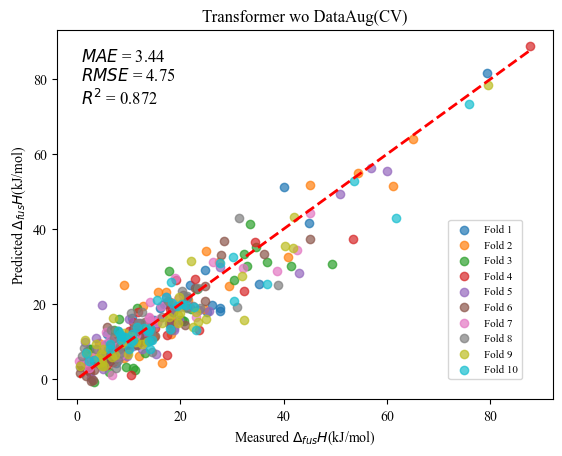

In [3]:

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


df = pd.DataFrame()
for i in range(1, 11):
    filename = f"training_results/fusH/TF WO DA/fold_{i}_predictions_tf.csv"
    fold_df = pd.read_csv(filename)
    df = pd.concat([df, fold_df])


mae = mean_absolute_error(df['Experimental Value'], df['Predicted Value'])
rmse = np.sqrt(mean_squared_error(df['Experimental Value'], df['Predicted Value']))
r2 = r2_score(df['Experimental Value'], df['Predicted Value'])

df['MAE'] = abs(df['Experimental Value'] - df['Predicted Value'])
df_sorted = df.sort_values('MAE', ascending=False)
top_10_mae = df_sorted.head(10)
print(top_10_mae)

fig, ax = plt.subplots()
for i in range(1, 11):
    fold_df = pd.read_csv(f"training_results/fusH/TF WO DA/fold_{i}_predictions_tf.csv")
    ax.scatter(fold_df['Experimental Value'], fold_df['Predicted Value'], label=f'Fold {i}', alpha=0.7)

ax.plot([df['Experimental Value'].min(), df['Experimental Value'].max()],
        [df['Experimental Value'].min(), df['Experimental Value'].max()], 'r--', lw=2)

ax.set_xlabel('Measured $Δ_{fus}}$$H$(kJ/mol)')
ax.set_ylabel('Predicted $Δ_{fus}}$$H$(kJ/mol)')
ax.text(0.05, 0.95, f"$MAE$ = {mae:.2f}\n$RMSE$ = {rmse:.2f}\n$R^2$ = {r2:.3f}", fontsize=12, transform=ax.transAxes, verticalalignment='top')
ax.set_title('Transformer wo DataAug(CV)')
ax.legend(bbox_to_anchor=(0.95, 0.5), fontsize=8)

plt.savefig('TF WO DA(fusH_CV).png', dpi=600)  
plt.show()


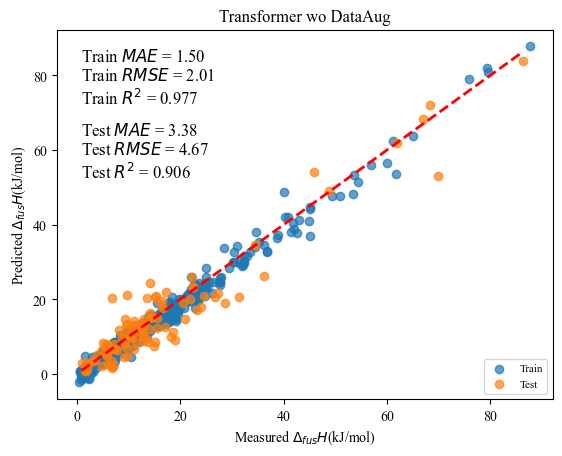

In [4]:
#TEST

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


df_train = pd.read_csv('training_results/fusH/TF WO DA/traindata_predictions_tf.csv')
df_test = pd.read_csv('training_results/fusH/TF WO DA/testdata_predictions_tf.csv')


mae_train = mean_absolute_error(df_train['Experimental Value'], df_train['Predicted Value'])
rmse_train = np.sqrt(mean_squared_error(df_train['Experimental Value'], df_train['Predicted Value']))
r2_train = r2_score(df_train['Experimental Value'], df_train['Predicted Value'])

mae_test = mean_absolute_error(df_test['Experimental Value'], df_test['Predicted Value'])
rmse_test = np.sqrt(mean_squared_error(df_test['Experimental Value'], df_test['Predicted Value']))
r2_test = r2_score(df_test['Experimental Value'], df_test['Predicted Value'])


fig, ax = plt.subplots()
ax.scatter(df_train['Experimental Value'], df_train['Predicted Value'], label='Train', alpha=0.7)
ax.scatter(df_test['Experimental Value'], df_test['Predicted Value'], label='Test', alpha=0.7)

ax.plot([df_test['Experimental Value'].min(), df_test['Experimental Value'].max()],
        [df_test['Experimental Value'].min(), df_test['Experimental Value'].max()], 'r--', lw=2)

ax.set_xlabel('Measured $Δ_{fus}}$$H$(kJ/mol)')
ax.set_ylabel('Predicted $Δ_{fus}}$$H$(kJ/mol)')
ax.text(0.05, 0.95, f"Train $MAE$ = {mae_train:.2f}\nTrain $RMSE$ = {rmse_train:.2f}\nTrain $R^2$ = {r2_train:.3f}", fontsize=12, transform=ax.transAxes, verticalalignment='top')
ax.text(0.05, 0.75, f"Test $MAE$ = {mae_test:.2f}\nTest $RMSE$ = {rmse_test:.2f}\nTest $R^2$ = {r2_test:.3f}", fontsize=12, transform=ax.transAxes, verticalalignment='top')
ax.set_title('Transformer wo DataAug')
ax.legend(loc='lower right', fontsize=8)

plt.savefig('TF WO DA(fusH_test).png', dpi=600)  
plt.show()


3.Transformer with Data Augmentation

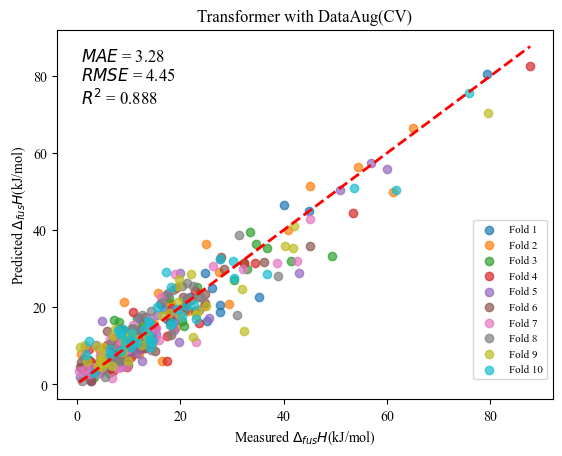

In [5]:
#CV
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

final_data = pd.DataFrame(columns=['Experimental Value', 'Predicted Value'])

for i in range(1, 11):
    filename = f"training_results/fusH/TF W DA/fold_{i}_predictions_tf.csv"
    df = pd.read_csv(filename)
    grouped_df = df.groupby(df.index // 10)  
    group_data_list = []
    for _, group_data in grouped_df:
        experimental_value = group_data['Experimental Value'].iloc[0]  
        mean_predicted_value = group_data['Predicted Value'].mean()  
        group_data_list.append({'Experimental Value': experimental_value, 'Predicted Value': mean_predicted_value})
    
    final_data = pd.concat([final_data, pd.DataFrame(group_data_list)], ignore_index=True)

# print(final_data)

mae = mean_absolute_error(final_data['Experimental Value'], final_data['Predicted Value'])
rmse = np.sqrt(mean_squared_error(final_data['Experimental Value'], final_data['Predicted Value']))
r2 = r2_score(final_data['Experimental Value'], final_data['Predicted Value'])


fig, ax = plt.subplots()
for i in range(1, 11):
        filename = f"training_results/fusH/TF W DA/fold_{i}_predictions_tf.csv"
        df = pd.read_csv(filename)
        grouped_df = df.groupby(df.index // 10)  
        group_data_list = []
        for _, group_data in grouped_df:
                experimental_value = group_data['Experimental Value'].iloc[0]  
                mean_predicted_value = group_data['Predicted Value'].mean()  
                group_data_list.append({'Experimental Value': experimental_value, 'Predicted Value': mean_predicted_value})
        ax.scatter( pd.DataFrame(group_data_list)['Experimental Value'],  pd.DataFrame(group_data_list)['Predicted Value'], label=f'Fold {i}', alpha=0.7)

ax.plot([final_data['Experimental Value'].min(), final_data['Experimental Value'].max()],
        [final_data['Experimental Value'].min(), final_data['Experimental Value'].max()], 'r--', lw=2)
ax.set_xlabel('Measured $Δ_{fus}}$$H$(kJ/mol)')
ax.set_ylabel('Predicted $Δ_{fus}}$$H$(kJ/mol)')
ax.text(0.05, 0.95, f"$MAE$ = {mae:.2f}\n$RMSE$ = {rmse:.2f}\n$R^2$ = {r2:.3f}", fontsize=12, transform=ax.transAxes, verticalalignment='top')
ax.set_title('Transformer with DataAug(CV)')
ax.legend(bbox_to_anchor=(1, 0.5), fontsize=8)

plt.savefig('TF W DA(fusH_CV).png', dpi=600)  
plt.show()



402 101


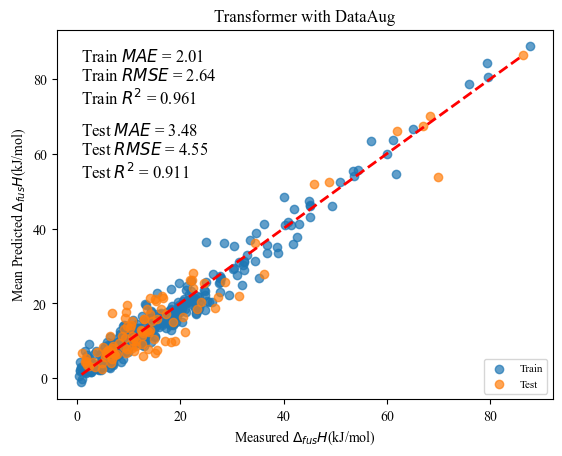

In [6]:
#TEST

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


df_train = pd.read_csv('training_results/fusH/TF W DA/traindata_predictions_tf.csv')
df_test = pd.read_csv('training_results/fusH/TF W DA/testdata_predictions_tf.csv')

df_train_mean = df_train.groupby(df_train.index // 10)['Predicted Value'].mean().reset_index()
df_test_mean = df_test.groupby(df_test.index // 10)['Predicted Value'].mean().reset_index()
df_train_mean['Experimental Value'] = df_train.groupby(df_train.index // 10)['Experimental Value'].mean()
df_test_mean['Experimental Value'] = df_test.groupby(df_test.index // 10)['Experimental Value'].mean()

print(len(df_train_mean),len(df_test_mean))

mae_train = mean_absolute_error(df_train_mean['Experimental Value'], df_train_mean['Predicted Value'])
rmse_train = np.sqrt(mean_squared_error(df_train_mean['Experimental Value'], df_train_mean['Predicted Value']))
r2_train = r2_score(df_train_mean['Experimental Value'], df_train_mean['Predicted Value'])

mae_test = mean_absolute_error(df_test_mean['Experimental Value'], df_test_mean['Predicted Value'])
rmse_test = np.sqrt(mean_squared_error(df_test_mean['Experimental Value'], df_test_mean['Predicted Value']))
r2_test = r2_score(df_test_mean['Experimental Value'], df_test_mean['Predicted Value'])


fig, ax = plt.subplots()
ax.scatter(df_train_mean['Experimental Value'], df_train_mean['Predicted Value'], label='Train', alpha=0.7)
ax.scatter(df_test_mean['Experimental Value'], df_test_mean['Predicted Value'], label='Test', alpha=0.7)

ax.plot([df_test_mean['Experimental Value'].min(), df_test_mean['Experimental Value'].max()],
        [df_test_mean['Experimental Value'].min(), df_test_mean['Experimental Value'].max()], 'r--', lw=2)

ax.set_xlabel('Measured $Δ_{fus}}$$H$(kJ/mol)')
ax.set_ylabel('Mean Predicted $Δ_{fus}}$$H$(kJ/mol)')
ax.text(0.05, 0.95, f"Train $MAE$ = {mae_train:.2f}\nTrain $RMSE$ = {rmse_train:.2f}\nTrain $R^2$ = {r2_train:.3f}", fontsize=12, transform=ax.transAxes, verticalalignment='top')
ax.text(0.05, 0.75, f"Test $MAE$ = {mae_test:.2f}\nTest $RMSE$ = {rmse_test:.2f}\nTest $R^2$ = {r2_test:.3f}", fontsize=12, transform=ax.transAxes, verticalalignment='top')
ax.set_title('Transformer with DataAug')
ax.legend(loc='lower right', fontsize=8)

plt.savefig('TF W DA(fusH_test).png', dpi=600)  
plt.show()

4.GNN

    Experimental Value  Predicted Value        MAE
1            43.000000        26.252558  16.747442
26           49.400010        34.852203  14.547807
23           61.199997        47.184082  14.015915
29           25.100002        36.661780  11.561778
19            9.219999        20.128002  10.908003
5            16.440000         5.658030  10.781970
2            19.200000        29.613800  10.413800
35           29.400000        20.291569   9.108431
24           53.360010        44.346947   9.013063
19           32.300003        23.371510   8.928493


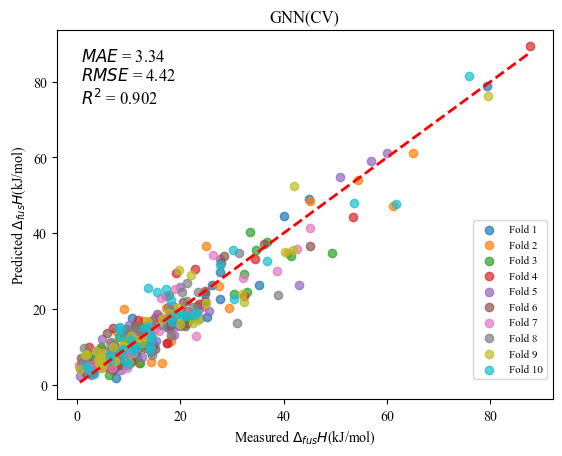

In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.DataFrame()
for i in range(1, 6):
    filename = f"training_results/fusH/GNN/fold_{i}_predictions_gnn.csv"
    fold_df = pd.read_csv(filename)
    df = pd.concat([df, fold_df])


mae = mean_absolute_error(df['Experimental Value'], df['Predicted Value'])
rmse = np.sqrt(mean_squared_error(df['Experimental Value'], df['Predicted Value']))
r2 = r2_score(df['Experimental Value'], df['Predicted Value'])

df['MAE'] = abs(df['Experimental Value'] - df['Predicted Value'])
df_sorted = df.sort_values('MAE', ascending=False)
top_10_mae = df_sorted.head(10)
print(top_10_mae)

fig, ax = plt.subplots()
for i in range(1, 11):
    fold_df = pd.read_csv(f"training_results/fusH/GNN/fold_{i}_predictions_gnn.csv")
    ax.scatter(fold_df['Experimental Value'], fold_df['Predicted Value'], label=f'Fold {i}', alpha=0.7)

ax.plot([df['Experimental Value'].min(), df['Experimental Value'].max()],
        [df['Experimental Value'].min(), df['Experimental Value'].max()], 'r--', lw=2)
ax.set_xlabel('Measured $Δ_{fus}}$$H$(kJ/mol)')
ax.set_ylabel('Predicted $Δ_{fus}}$$H$(kJ/mol)')

ax.text(0.05, 0.95, f"$MAE$ = {mae:.2f}\n$RMSE$ = {rmse:.2f}\n$R^2$ = {r2:.3f}", fontsize=12, transform=ax.transAxes, verticalalignment='top')

ax.set_title('GNN(CV)')

ax.legend(bbox_to_anchor=(1, 0.5), fontsize=8)

plt.savefig('GNN(fusH_CV).png', dpi=600)  
plt.show()

     Experimental Value  Predicted Value        MAE
41            69.900000        50.963806  18.936194
0              6.899999        17.581291  10.681292
45            18.300000         9.503283   8.796717
54            14.200000        22.677526   8.477526
52            36.300003        28.412102   7.887901
38            13.000000        20.825360   7.825360
100           17.120000         9.558784   7.561216
13            18.700000        11.402278   7.297722
53            26.800000        19.748837   7.051163
90            21.000000        14.112965   6.887035


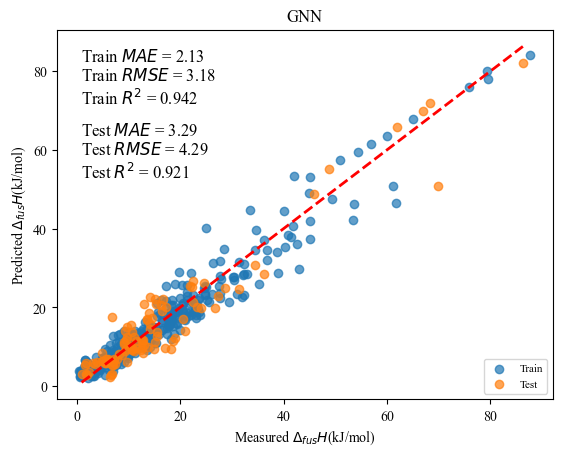

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


df_train = pd.read_csv('training_results/fusH/GNN/traindata_predictions_gnn.csv')
df_test = pd.read_csv('training_results/fusH/GNN/testdata_predictions_gnn.csv')

mae_train = mean_absolute_error(df_train['Experimental Value'], df_train['Predicted Value'])
rmse_train = np.sqrt(mean_squared_error(df_train['Experimental Value'], df_train['Predicted Value']))
r2_train = r2_score(df_train['Experimental Value'], df_train['Predicted Value'])

mae_test = mean_absolute_error(df_test['Experimental Value'], df_test['Predicted Value'])
rmse_test = np.sqrt(mean_squared_error(df_test['Experimental Value'], df_test['Predicted Value']))
r2_test = r2_score(df_test['Experimental Value'], df_test['Predicted Value'])

df_test['MAE'] = abs(df_test['Experimental Value'] - df_test['Predicted Value'])
df_sorted = df_test.sort_values('MAE', ascending=False)
top_10_mae = df_sorted.head(10)
print(top_10_mae)

fig, ax = plt.subplots()
ax.scatter(df_train['Experimental Value'], df_train['Predicted Value'], label='Train', alpha=0.7)
ax.scatter(df_test['Experimental Value'], df_test['Predicted Value'], label='Test', alpha=0.7)

ax.plot([df_test['Experimental Value'].min(), df_test['Experimental Value'].max()],
        [df_test['Experimental Value'].min(), df_test['Experimental Value'].max()], 'r--', lw=2)

ax.set_xlabel('Measured $Δ_{fus}}$$H$(kJ/mol)')
ax.set_ylabel('Predicted $Δ_{fus}}$$H$(kJ/mol)')
ax.text(0.05, 0.95, f"Train $MAE$ = {mae_train:.2f}\nTrain $RMSE$ = {rmse_train:.2f}\nTrain $R^2$ = {r2_train:.3f}", fontsize=12, transform=ax.transAxes, verticalalignment='top')
ax.text(0.05, 0.75, f"Test $MAE$ = {mae_test:.2f}\nTest $RMSE$ = {rmse_test:.2f}\nTest $R^2$ = {r2_test:.3f}", fontsize=12, transform=ax.transAxes, verticalalignment='top')
ax.set_title('GNN')
ax.legend(loc='lower right', fontsize=8)

plt.savefig('GNN(fusH_test).png', dpi=600)  
plt.show()


5.Prediction

In [3]:
import torch
import pandas as pd
from model import Transformer,AttentiveFP
import yaml
from dataset import SMILES_dataset,Graph_dataset
from tokenizer import SMILESTokenizer
from torch_geometric.loader import DataLoader
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from rdkit import Chem



def randomize_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        new_smiles_list = []
        for i in range(10):  
            new_smiles = Chem.MolToSmiles(mol, doRandom=True)
            new_smiles_list.append(new_smiles)
        return new_smiles_list
    else:
        return [smiles] * 10


class Normalizer(object):
    """Normalize a Tensor and restore it later. """

    def __init__(self, tensor):
        """tensor is taken as a sample to calculate the mean and std"""
        self.mean = torch.mean(tensor)
        self.std = torch.std(tensor)

    def norm(self, tensor):
        return (tensor - self.mean) / self.std

    def denorm(self, normed_tensor):
        return normed_tensor * self.std + self.mean

    def state_dict(self):
        return {'mean': self.mean,
                'std': self.std}

    def load_state_dict(self, state_dict):
        self.mean = state_dict['mean']
        self.std = state_dict['std']


def predict_csv(input_path,output_path,model_name,config,device):
    
    df = pd.read_csv(input_path)

    if model_name=='tf':
        expanded_rows = []
        for index, row in df.iterrows():
            smiles = row['SMILES']  
            expanded_smiles = randomize_smiles(smiles)

            for new_smiles in expanded_smiles:
                new_row = row.copy()
                new_row['SMILES'] = new_smiles  
                expanded_rows.append(new_row)

        expanded_df = pd.concat([pd.DataFrame([row]) for row in expanded_rows], ignore_index=True)


        dataset = SMILES_dataset(df=expanded_df, tokenizer=SMILESTokenizer(config['vocab_path'], model_max_length=128, padding_side='right'), target='fusH')
        model = Transformer(**config["transformer"]).to(device)
        model.load_state_dict(torch.load("model_weight/tf/TF W DA for fusH/best_tf w da_model.pth"))
        model.eval()

        normalizer = Normalizer(torch.tensor([0], dtype=torch.float32))
        normalizer.load_state_dict(state_dict = {'mean': 15.6033, 'std': 13.2698})   #TF W DA   tensor(15.6033) tensor(13.2698) torch.Size([4020, 1, 1])

        loader = DataLoader(dataset, batch_size=config['batch_size'], shuffle=False)

        y, pred = [], []

        with torch.no_grad():
            for datas, label in loader:
                data = [data.to(device) for data in datas]
                label = label.to(device)
                label = normalizer.norm(label)
                output = model(data)

                label = normalizer.denorm(label)
                output = normalizer.denorm(output)

                y.extend(label.detach().cpu().numpy())
                pred.extend(output.detach().cpu().numpy())

        y, pred = np.array(y).flatten(), np.array(pred).flatten()
        df_results = pd.DataFrame({'Experimental Value': y, 'Predicted Value': pred})


        experimental_values = []
        predicted_values = []

        for i in range(0, len(df_results), 10):
            predicted_value = df_results['Predicted Value'][i:i+10]
            experimental_value = df_results['Experimental Value'][i:i+10]

            if len(set(experimental_value)) == 1:
                experimental_value = experimental_value.sample(n=1).values[0]
            else:
                print("Error: Experimental values are not the same in this group!")
                continue

            predicted_value_mean = np.mean(predicted_value)
            experimental_values.append(experimental_value)
            predicted_values.append(predicted_value_mean)

    elif model_name=='gnn':

        dataset = Graph_dataset(df, target='fusH')
        model = AttentiveFP(**config["gnn"]).to(device)
        model.load_state_dict(torch.load("model_weight/gnn/best_gnn_model.pth"))
        model.eval()

        normalizer = Normalizer(torch.tensor([0], dtype=torch.float32))
        normalizer.load_state_dict(state_dict = {'mean': 15.6033, 'std': 13.2847})   #GNN tensor(15.6033) tensor(13.2847) torch.Size([402, 1, 1])

        loader = DataLoader(dataset, batch_size=config['batch_size'], shuffle=False)

        experimental_values = []
        predicted_values = []

        with torch.no_grad():
            for datas, label in loader:

                datas, label = datas.to(device), label.to(device)
                label = normalizer.norm(label)
                output = model(datas)

                label = normalizer.denorm(label)
                output = normalizer.denorm(output)

                experimental_values.extend(label.detach().cpu().numpy())
                predicted_values.extend(output.detach().cpu().numpy())

            experimental_values, predicted_values = np.array(experimental_values).flatten(), np.array(predicted_values).flatten()

    else:
        print('Error for model name!')

    dfs = pd.DataFrame()
    dfs['Experimental Values'] = experimental_values
    dfs['Predicted Values'] = predicted_values
    mae = mean_absolute_error(experimental_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(experimental_values, predicted_values))
    r2 = r2_score(experimental_values, predicted_values)

    df_with_results = pd.concat([df, dfs], axis=1)
    df_with_results.to_csv(output_path, index=False)

    return mae, rmse, r2



config = yaml.load(open("config_fusH.yaml", "r"), Loader=yaml.FullLoader)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


input_path='fusH_data/pre_data.csv'
output_path='training_results/predictions.csv'
model_name='gnn'


MAE,RMSE,R2=predict_csv(input_path,output_path,model_name,config,device)
print(f"Mean Absolute Error (MAE): {MAE}")
print(f"Root Mean Squared Error (RMSE): {RMSE}")
print(f"R-squared (R2) Score: {R2}")

----info----
data_length 7
------------


RuntimeError: Error(s) in loading state_dict for AttentiveFP:
	Missing key(s) in state_dict: "atom_convs.0.lin1.weight", "atom_convs.0.lin2.weight". 
	Unexpected key(s) in state_dict: "atom_convs.0.lin1_src.weight", "atom_convs.0.lin2_src.weight". 